In [2]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import time
import supervision as sv

1. Classification

In [3]:
model_c = YOLO('yolo11s-cls.pt')
model_c.names

{0: 'tench',
 1: 'goldfish',
 2: 'great_white_shark',
 3: 'tiger_shark',
 4: 'hammerhead',
 5: 'electric_ray',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich',
 10: 'brambling',
 11: 'goldfinch',
 12: 'house_finch',
 13: 'junco',
 14: 'indigo_bunting',
 15: 'robin',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water_ouzel',
 21: 'kite',
 22: 'bald_eagle',
 23: 'vulture',
 24: 'great_grey_owl',
 25: 'European_fire_salamander',
 26: 'common_newt',
 27: 'eft',
 28: 'spotted_salamander',
 29: 'axolotl',
 30: 'bullfrog',
 31: 'tree_frog',
 32: 'tailed_frog',
 33: 'loggerhead',
 34: 'leatherback_turtle',
 35: 'mud_turtle',
 36: 'terrapin',
 37: 'box_turtle',
 38: 'banded_gecko',
 39: 'common_iguana',
 40: 'American_chameleon',
 41: 'whiptail',
 42: 'agama',
 43: 'frilled_lizard',
 44: 'alligator_lizard',
 45: 'Gila_monster',
 46: 'green_lizard',
 47: 'African_chameleon',
 48: 'Komodo_dragon',
 49: 'African_crocodile',
 50: 'American_alligator',
 51: 'triceratops',
 

In [15]:
results_c = model_c.predict("demo5_images/canNships.jpeg",verbose = True)

print(type(results_c))
print("Number of results: ",len(results_c))
print("Index of class: ",results_c[0].probs.top5)
print("Confidence of class: ",results_c[0].probs.top5conf)
print("Inference Time: ", results_c[0].speed)


image 1/1 d:\01_FOT_USJP_TeachingMaterial\06_MachineVisionSystems\02_LectureDemonstrations_2024\B5-Repo\ETM4272\demo5_images\canNships.jpeg: 224x224 moving_van 0.78, ambulance 0.09, police_van 0.07, limousine 0.01, garbage_truck 0.01, 52.5ms
Speed: 2.9ms preprocess, 52.5ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
<class 'list'>
Number of results:  1
Index of class:  [675, 407, 734, 627, 569]
Confidence of class:  tensor([0.7761, 0.0880, 0.0719, 0.0100, 0.0097])
Inference Time:  {'preprocess': 2.942323684692383, 'inference': 52.53005027770996, 'postprocess': 0.0}


2. Detection

In [16]:
model_d = YOLO('yolo11s.pt')
model_d.names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou


image 1/1 d:\01_FOT_USJP_TeachingMaterial\06_MachineVisionSystems\02_LectureDemonstrations_2024\B5-Repo\ETM4272\demo5_images\cars1.jpg: 416x640 14 cars, 1 surfboard, 327.8ms
Speed: 7.0ms preprocess, 327.8ms inference, 3.0ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict2
<class 'list'>
Number of results:  1
Number of boxes:  15


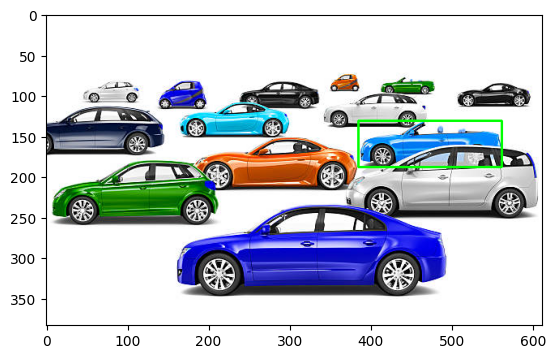

In [24]:
results_d = model_d.predict("demo5_images/cars1.jpg",verbose = True,save=True)


print(type(results_d))
print("Number of results: ",len(results_d))
print("Number of boxes: ",len(results_d[0].boxes))

img = cv2.imread("demo5_images/cars1.jpg")

for box in results_d[0].boxes:
    # Check if the box is a car
    if int(box.cls.item()) != 2:        # Check if the class is a car
        boxcoord = box.xyxy.tolist()[0]
        boxcoord = [int(i) for i in boxcoord]
        # convert boxcord into list of integers
        # draw the box
        img = cv2.rectangle(img, (boxcoord[0], boxcoord[1]), (boxcoord[2], boxcoord[3]), (0, 255, 0), 2)

plt.imshow(img)
plt.show()

3. Segmentation

In [25]:
model_s = YOLO('yolo11s-seg.pt')

Results saved to runs\segment\predict3
<class 'list'>
Number of results:  1
Number of boxes:  15
Number of masks:  15
Original Image Shape : (383, 612, 3)


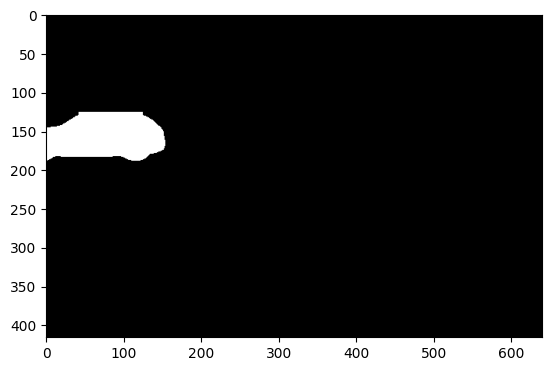

In [26]:
res_s = model_s.predict("demo5_images/cars1.jpg",verbose = False,save= True)

print(type(res_s))
print("Number of results: ",len(res_s))
print("Number of boxes: ",len(res_s[0].boxes))
print("Number of masks: ",len(res_s[0].masks))

img = cv2.imread("demo5_images/cars1.jpg")
print("Original Image Shape :",img.shape)

results = res_s

mask_arb = results[0].masks.data[12].numpy()
plt.imshow(mask_arb, cmap='gray')
plt.show()

# Plot the mask of the surfboard


4. Landmark Detection

In [ ]:
# Homework 

5. Depth Estimation

In [1]:
# Depth Estimation
from transformers import pipeline

In [ ]:
pipe = pipeline(task="depth-estimation", model="depth-anything/Depth-Anything-V2-Small-hf")

In [7]:
image = Image.open("demo5_images\kingChair.jpg")

st = time.time()
depth = pipe(image)["depth"]
et = time.time()

print("Time taken: ",et-st,"seconds")

Time taken:  0.8526043891906738 seconds


5.1 Non Trivial Task: Estimate distance to centroid of chair 

In [ ]:
# Detect the chair in the image

# Calculate the centroid of the chair 

# Obtain the depth map 

# Query the value of the depth map at the centroid's location

5.2 Non Trivial Task: Tracking

In [8]:
model_tr = YOLO("yolo11n.pt")

100%|██████████| 5.35M/5.35M [00:05<00:00, 1.03MB/s]


5.2.2: Tracking using Supervision

In [38]:
model = YOLO("yolo11n.pt")
box_annotator = sv.BoxAnnotator()
tracker = sv.ByteTrack()
label_annotator = sv.LabelAnnotator()

def callback(frame: np.ndarray, _: int) -> np.ndarray:
    results = model(frame)[0]
    detections = sv.Detections.from_ultralytics(results)
    detections = tracker.update_with_detections(detections)

    labels = [
        f"#{tracker_id} {results.names[class_id]}"
        for class_id, tracker_id
        in zip(detections.class_id, detections.tracker_id)
    ]

    annotated_frame = box_annotator.annotate(
        frame.copy(), detections=detections)
    return label_annotator.annotate(
        annotated_frame, detections=detections, labels=labels)

sv.process_video(
    source_path="demo5_images\\vehicle-counting.mp4",
    target_path="result_tracking.mp4",
    callback=callback
)


0: 384x640 3 cars, 1 truck, 82.7ms
Speed: 3.0ms preprocess, 82.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 1 truck, 87.5ms
Speed: 2.2ms preprocess, 87.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 80.3ms
Speed: 3.0ms preprocess, 80.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 77.5ms
Speed: 3.0ms preprocess, 77.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 truck, 80.7ms
Speed: 3.0ms preprocess, 80.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 truck, 79.2ms
Speed: 3.0ms preprocess, 79.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 128.1ms
Speed: 4.0ms preprocess, 128.1ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 77.1ms
Speed: 2.0ms preprocess, 77.1ms

In [43]:
model = YOLO("yolo11n.pt")
tracker = sv.ByteTrack()

video_path = "demo5_images\\vehicle-counting.mp4"
cap = cv2.VideoCapture(video_path)


success,frame1 = cap.read()
success,frame2 = cap.read()


res_curr = model_tr.predict(frame1)[0]
detections = sv.Detections.from_ultralytics(res_curr)
detections = tracker.update_with_detections(detections)
tracker_ids = detections.tracker_id
class_ids = detections.class_id

print("Class Ids: ",class_ids)
print("Tracker Ids: ",tracker_ids)


res_curr = model_tr.predict(frame2)[0]
detections = sv.Detections.from_ultralytics(res_curr)
detections = tracker.update_with_detections(detections)
tracker_ids = detections.tracker_id
class_ids = detections.class_id

print("Class Ids: ",class_ids)
print("Tracker Ids: ",tracker_ids)


0: 384x640 3 cars, 1 truck, 91.0ms
Speed: 3.0ms preprocess, 91.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
Class Ids:  [7 2 2 2]
Tracker Ids:  [51 52 53 54]

0: 384x640 3 cars, 1 truck, 82.0ms
Speed: 3.0ms preprocess, 82.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
Class Ids:  [7 2 2 2]
Tracker Ids:  [51 52 53 54]


6. Software Acceleration - OpenVINO

In [3]:
model_orig = YOLO("yolo11l.pt")

In [4]:
results = model_orig.predict("demo5_images/cars1.jpg",verbose = True)


image 1/1 d:\01_FOT_USJP_TeachingMaterial\06_MachineVisionSystems\02_LectureDemonstrations_2024\B5-Repo\ETM4272\demo5_images\cars1.jpg: 416x640 14 cars, 451.3ms
Speed: 2.0ms preprocess, 451.3ms inference, 3.0ms postprocess per image at shape (1, 3, 416, 640)


In [13]:
model_orig.export(format = 'onnx')
model_orig.export(format="openvino") 

Ultralytics 8.3.63  Python-3.11.7 torch-2.2.1+cpu CPU (11th Gen Intel Core(TM) i5-1135G7 2.40GHz)

PyTorch: starting from 'yolo11l.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (49.0 MB)

ONNX: starting export with onnx 1.15.0 opset 17...
ONNX: slimming with onnxslim 0.1.47...
ONNX: export success  8.7s, saved as 'yolo11l.onnx' (97.0 MB)

Export complete (10.0s)
Results saved to D:\01_FOT_USJP_TeachingMaterial\06_MachineVisionSystems\02_LectureDemonstrations_2024\B5-Repo\ETM4272
Predict:         yolo predict task=detect model=yolo11l.onnx imgsz=640  
Validate:        yolo val task=detect model=yolo11l.onnx imgsz=640 data=/ultralytics/ultralytics/cfg/datasets/coco.yaml  
Visualize:       https://netron.app
Ultralytics 8.3.63  Python-3.11.7 torch-2.2.1+cpu CPU (11th Gen Intel Core(TM) i5-1135G7 2.40GHz)

PyTorch: starting from 'yolo11l.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (49.0 MB)

OpenVINO: starting export with open

[ WARNING ]  From %s: The name %s is deprecated. Please use %s instead.



OpenVINO: export success  14.8s, saved as 'yolo11l_openvino_model\' (97.3 MB)

Export complete (16.2s)
Results saved to D:\01_FOT_USJP_TeachingMaterial\06_MachineVisionSystems\02_LectureDemonstrations_2024\B5-Repo\ETM4272
Predict:         yolo predict task=detect model=yolo11l_openvino_model imgsz=640  
Validate:        yolo val task=detect model=yolo11l_openvino_model imgsz=640 data=/ultralytics/ultralytics/cfg/datasets/coco.yaml  
Visualize:       https://netron.app


'yolo11l_openvino_model'

In [3]:
model_onnx = YOLO("yolo11l.onnx")
model_ov = YOLO("yolo11l_openvino_model/")

WARNING  Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
WARNING  Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.


In [4]:
res_onnx = model_onnx("demo5_images/cars1.jpg")
res_ov = model_ov("demo5_images/cars1.jpg")

Loading yolo11l.onnx for ONNX Runtime inference...
Using ONNX Runtime CPUExecutionProvider

image 1/1 d:\01_FOT_USJP_TeachingMaterial\06_MachineVisionSystems\02_LectureDemonstrations_2024\B5-Repo\ETM4272\demo5_images\cars1.jpg: 640x640 14 cars, 554.5ms
Speed: 5.0ms preprocess, 554.5ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Loading yolo11l_openvino_model for OpenVINO inference...
Using OpenVINO LATENCY mode for batch=1 inference...


: 